In [108]:
import pandas as pd
import numpy as np
import os
import seaborn as sb

In [109]:
files = os.listdir("./attmatrix/")
all_files = []
for f in files:
    if ".csv" in f:
        all_files.append(f)
        
all_files.sort()

In [110]:
all_dfs = []

for f in all_files:
    this_df = pd.read_csv("./attmatrix/"+f)
    this_df2 = this_df.drop(columns = ['label', 'node_label', 'area', 'x', 'y'])
    labels_df = this_df[['label']]
    all_dfs.append(this_df2)

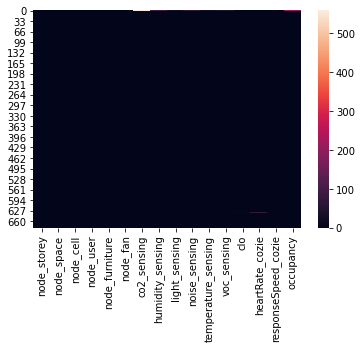

In [111]:
sb.heatmap(all_dfs[0])

In [112]:
import json

labels_df['label_list'] = labels_df['label'].apply(lambda x : json.loads(x))
labels_matrix = np.array(list(labels_df['label_list']))

labels_matrix.shape



/Users/mahmoud/opt/anaconda3/envs/phd_proposal/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(681, 9)

In [113]:
all_mats = []
for df in all_dfs:
    all_mats.append(df.to_numpy())
attmat = np.array(all_mats)
attmat.shape

(132, 681, 16)

In [114]:
final_attmat = np.moveaxis(attmat, 0, -2)

In [115]:
final_attmat.shape

(681, 132, 16)

In [116]:
np.savez("attmatrix.npz", attmats=final_attmat, labels = labels_matrix)

In [117]:
f = np.load("attmatrix.npz")


In [118]:
for i in f:
    print(i)

attmats
labels
